<a href="https://colab.research.google.com/github/Srijan-Rai/Playstore/blob/main/Final_Play_Store_App_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Play Store App Analysis**

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#The data that we will be analysing has following csv files


*   Play store App data
*   User reviews



#**1. Importing the required libraries to analyse the data**

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#**2.Mount the drive and read the csv files and store them**

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV files

play_store_path = '/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv'

user_review_path = '/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv'

play_store_df = pd.read_csv(play_store_path)
user_df = pd.read_csv(user_review_path)

#**3.Retrieving the data : In this section we understand the various columns and datatype of each column**

**To know the shape of each csv file**

In [4]:
play_store_df.shape

(10841, 13)

In [5]:
user_df.shape

(64295, 5)

**To know the overall information about the dataframe**

In [6]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**To Know the number of columns present in dataframe**

In [8]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
user_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**To get the first 10 rows of each data frame**

In [10]:
play_store_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [11]:
user_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


**To know the last 10 rows of the dataframe**

In [12]:
play_store_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [13]:
user_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**To get descriptive summary of all the numerical columns present in dataframe**

In [14]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [15]:
user_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#**4.Data Cleansing : Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.** 
#**So before we start analysing the data, it must be cleansed and incorrect/missing data should be handled properly to obtain better results.**

**Step1: To remove the duplicates present in the dataframe**

In [16]:
# To eliminate duplicate rows
play_store_df.drop_duplicates(subset='App',keep='last',inplace=True)

**Step2: Removing outlier.** **An Outlier is the value that is out of the accepted range of values. Removing outlier for a valid reason will aid in better performance of data. An outlier does not always mean that data is incorrect.**

In [17]:
# Maximum Rated app is an outlier
play_store_df.loc[play_store_df["Rating"].idxmax(),:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

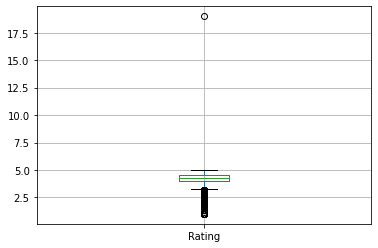

In [18]:
play_store_df.boxplot()

**As we can see from above boxplot that rating has value beyond 5 which is an outlier and hence it should be deleted.**

In [19]:
#Removing app with rating as 19 from the dataframe
play_store_df = play_store_df[play_store_df["Rating"]!=19]
user_df = user_df[user_df['App']!="Life Made WI-Fi Touchscreen Photo Frame"]

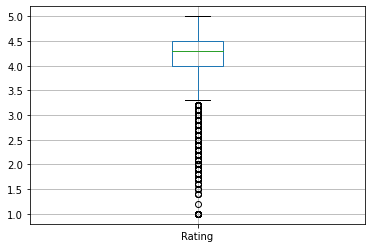

In [20]:
play_store_df.boxplot()

**Step3 : Handling NaN values and imputing them with appropriate value.**

**To know the total NaN values present in play_store dataframe**

In [21]:
play_store_df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**To know distribution of rating across different apps present in Play store dataframe**

Text(0, 0.5, 'Number Of Apps')

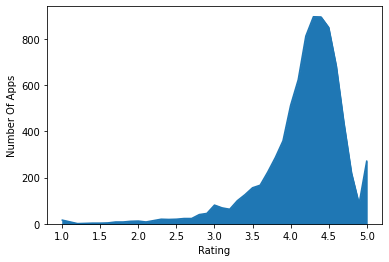

In [22]:
play_store_df.groupby("Rating")['App'].count().plot(kind = "area")
plt.xlabel("Rating")
plt.ylabel("Number Of Apps")

**Since we know from the graph that the data is skewed, it is good to consider the median value for replacing the missing values.Therefore imputing the 1463 NaN values present in Rating column with median value**

In [23]:
#Calculating the median value
play_store_df["Rating"].median()

4.3

In [24]:
#Replacing all the NaN values present in Ratings with the median value(4.3)

play_store_df['Rating'].fillna(play_store_df['Rating'].median(),inplace=True)

In [25]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**To remove NaN values from 'Translated_Review' column of User_Review df**

In [26]:
user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [27]:
user_df = user_df[~user_df['Translated_Review'].isna()]

**Step4: Data Manipulation**

**1.Size of the applications present in the datset are in MB and KB. Converting entire size column to MB and removing the suffix. For the ease of data processing, changing the data type to float**

In [28]:
#To remove M and K from size column and convert it to float
play_store_df.replace({'Size': '[M]'},'',regex=True,inplace=True)

play_store_df['Size']= play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str( x) else x)

play_store_df.replace('Varies with device',np.nan,inplace=True)

play_store_df['Size'] = play_store_df['Size'].astype(float) 

**2.Replace the '+' value present in Install column with space and convert it to Float**

In [29]:
#Converting Dtype of Installs to float
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: str(x).replace("+",'') if "+" in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: str(x).replace(",",'')if "," in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x : float(x))

**3.Converting Reviews column to float**

In [30]:
# Converting Dtype of Reviews to float
play_store_df["Reviews"] = play_store_df["Reviews"].apply(lambda x : float(x))

**4.Formatting Price column and converting it to Float**

In [31]:
play_store_df['Price']=play_store_df['Price'].apply(lambda x: str(x).replace("$",'')if "$" in str(x) else x)
play_store_df["Price"] = play_store_df["Price"].apply(lambda x : float(x))

**5.Formatting Last Updated column to date value**

In [32]:
# Converting Dtype of Last Updated to DateTime
play_store_df["Last Updated"] = pd.to_datetime(play_store_df["Last Updated"]).dt.date

**Now we are done with data cleansing, let us verify how it looks**

In [33]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     8597 non-null   object 
 12  Android Ver     8667 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB
